In [1]:
#import all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load dataset
loan_train = pd.read_csv("loan_train.csv")
df_train = loan_train.copy()
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#get basic understanding of data
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


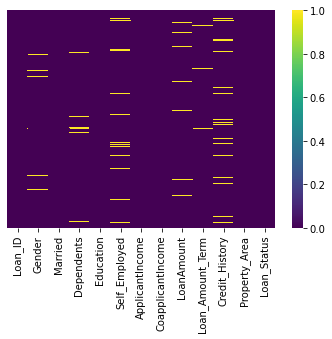

In [4]:
sns.heatmap(df_train.isnull(),yticklabels=False,cmap="viridis")

In [5]:
#removing null values from categorical attributes
df_train["Gender"]=df_train["Gender"].fillna(df_train["Gender"].mode()[0])
df_train["Married"]=df_train["Married"].fillna(df_train["Married"].mode()[0])
df_train["Dependents"]=df_train["Dependents"].fillna(df_train["Dependents"].mode()[0])
df_train["Self_Employed"]=df_train["Self_Employed"].fillna(df_train["Self_Employed"].mode()[0])

In [6]:
#removing null values from numerical attributes
df_train["LoanAmount"]=df_train["LoanAmount"].fillna(df_train["LoanAmount"].mean())
df_train["Loan_Amount_Term"]=df_train["Loan_Amount_Term"].fillna(df_train["Loan_Amount_Term"].mean())
df_train["Credit_History"]=df_train["Credit_History"].fillna(df_train["Credit_History"].mean())

In [7]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

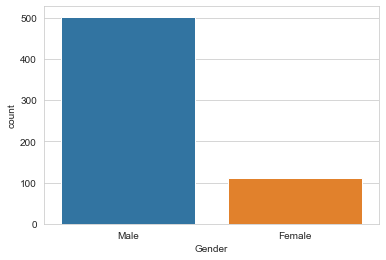

In [8]:
#analyze each categorical attribute
sns.set_style("whitegrid")
sns.countplot(x='Gender',data=df_train)

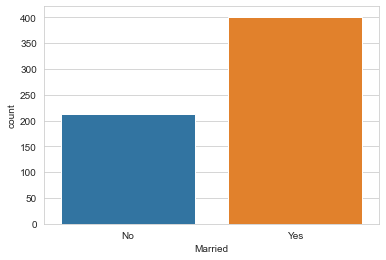

In [9]:
sns.set_style("whitegrid")
sns.countplot(x='Married',data=df_train)

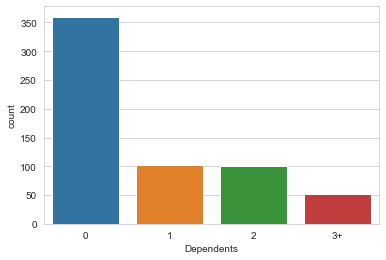

In [10]:
sns.set_style("whitegrid")
sns.countplot(x='Dependents',data=df_train)

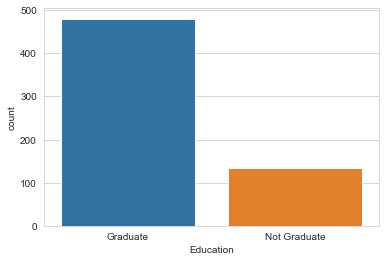

In [11]:
sns.set_style("whitegrid")
sns.countplot(x='Education',data=df_train)

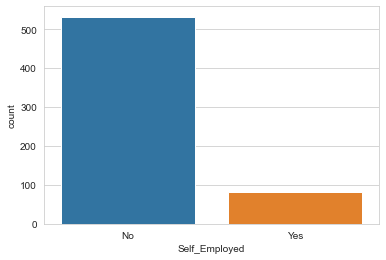

In [12]:
sns.set_style("whitegrid")
sns.countplot(x='Self_Employed',data=df_train)

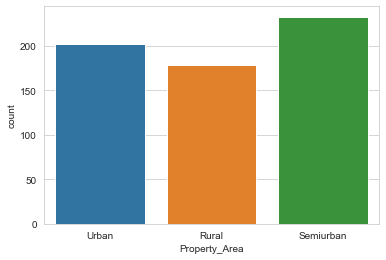

In [13]:
sns.set_style("whitegrid")
sns.countplot(x='Property_Area',data=df_train)

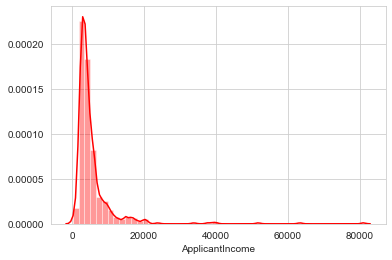

In [14]:
#analyze each numerical attribute
sns.distplot(df_train["ApplicantIncome"],color="red")

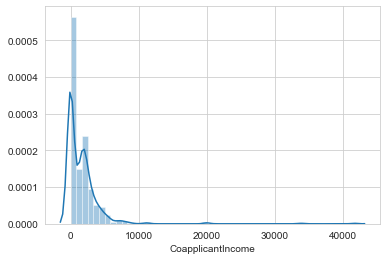

In [15]:
sns.distplot(df_train["CoapplicantIncome"])

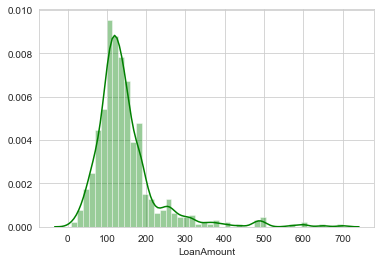

In [16]:
sns.distplot(df_train["LoanAmount"],color="green")

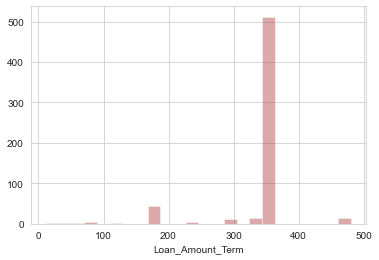

In [17]:
sns.distplot(df_train["Loan_Amount_Term"],kde=False,color="brown")

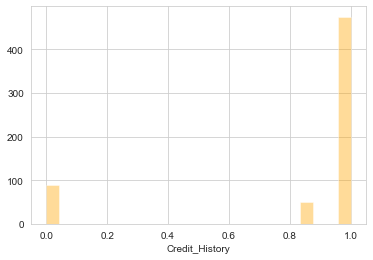

In [18]:
sns.distplot(df_train["Credit_History"],kde=False,color="orange")

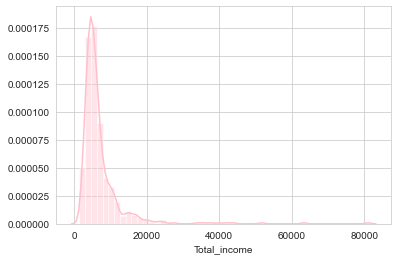

In [19]:
df_train['Total_income'] = df_train["ApplicantIncome"]+df_train["CoapplicantIncome"]
sns.distplot(df_train["Total_income"],color="pink")

In [20]:
# from the above data, we can see that some attributes are left skewed. We will use log transformation to handle this
df_train["ApplicantIncomeLog"] = np.log(df_train["ApplicantIncome"]+1)
df_train["CoapplicantIncomeLog"] = np.log(df_train["CoapplicantIncome"]+1)
df_train["LoanAmountLog"] = np.log(df_train["LoanAmount"]+1)
df_train["Loan_Amount_TermLog"] = np.log(df_train["Loan_Amount_Term"]+1)
df_train["Total_incomeLog"] = np.log(df_train["Total_income"]+1)

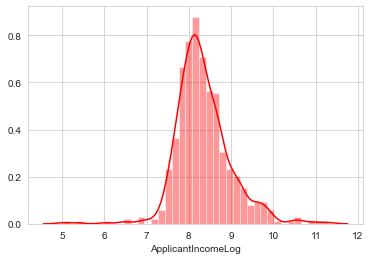

In [21]:
sns.distplot(df_train["ApplicantIncomeLog"],color="red")

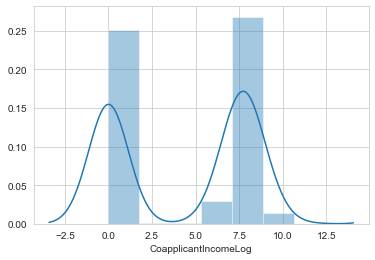

In [22]:
sns.distplot(df_train["CoapplicantIncomeLog"])

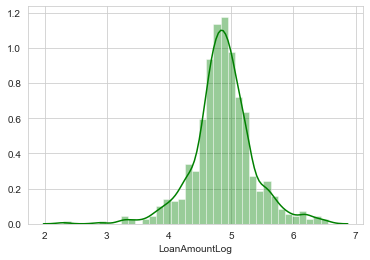

In [23]:
sns.distplot(df_train["LoanAmountLog"],color="green")

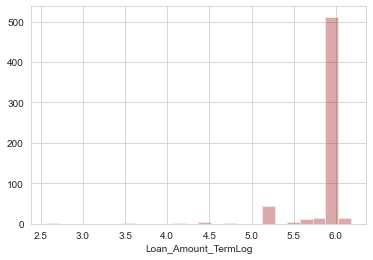

In [24]:
sns.distplot(df_train["Loan_Amount_TermLog"],kde=False,color="brown")

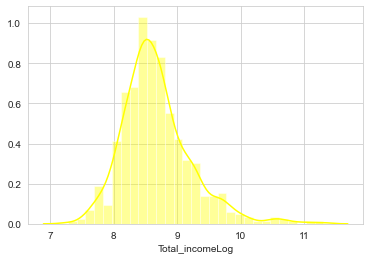

In [25]:
sns.distplot(df_train["Total_incomeLog"],color="yellow")

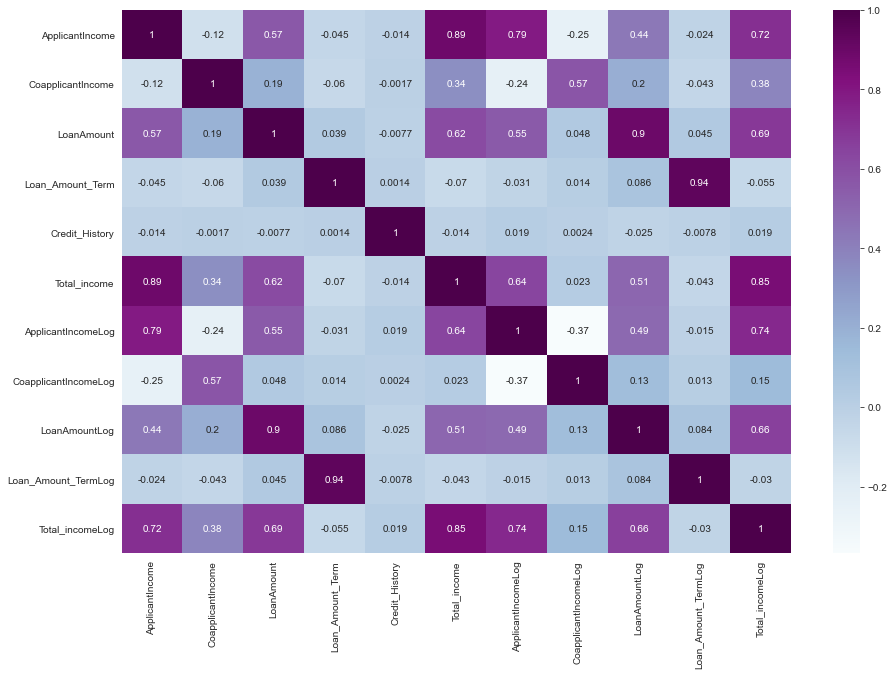

In [26]:
#we do correlation to see which attributes are not required. If 2 attributes have high correlation, then we can remove 1 of them
correlation = df_train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True,cmap="BuPu")

In [27]:
#drop unnecessary columns
cols=["Loan_ID","ApplicantIncome","CoapplicantIncome","CoapplicantIncomeLog","LoanAmount","Loan_Amount_Term","Total_income"]
df_train=df_train.drop(columns=cols,axis=1)

In [28]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_incomeLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [29]:
#Label encoding to categorical attributes which are non numeric to make it in machine understandable form
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ["Gender","Married","Self_Employed","Education","Property_Area","Loan_Status","Dependents"]
for c in cols:
    df_train[c]=le.fit_transform(df_train[c])

In [30]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_incomeLog
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


In [31]:
#split the data from tarining and testing and cross validation for better prediction and accuracy
x= df_train.drop("Loan_Status",axis=1)
y= df_train["Loan_Status"]
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import cross_val_score as cross
from sklearn.metrics import accuracy_score as scores
def classify(model,x,y):
    x_train,x_test,y_train,y_test = split(x,y,test_size=0.25,random_state=42)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("accuracy score",scores(y_test,y_pred))
    print("accuracy",model.score(x_test,y_test))
    score = cross(model,x,y,cv=5)
    print("cross validation",np.mean(score)*100)
    return y_test,y_pred

In [32]:
#calling method with RandomForest classifierand adjusting hyper parameter
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=25,min_samples_split=25,max_depth=7,max_features=1)
y_test,y_pred=classify(model,x,y)

accuracy score 0.7272727272727273
accuracy 0.7272727272727273
cross validation 76.87591630014661


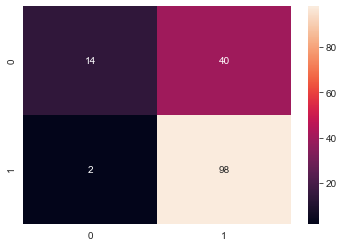

In [33]:
# confusion matrix to see what alues are predicted wrong
from sklearn.metrics import confusion_matrix as confusion
cm = confusion(y_test,y_pred)
sns.heatmap(cm,annot=True)